# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.

## 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP Score
1. ROC, AUC Score

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

# 분류(Classification) 평가 지표

##  양성과 음성
- 이진 분류에서 사용되는 개념
- 양성(Positive): 모델이 찾으려는 주 대상
- 음성(Negative): 모델이 찾으려는 주 대상이 아닌 것
- 예
    - 환자 분류 
        - 양성 - 환자, 음성 - 정상인
    - 스팸메일 분류 
        - 양성 - 스팸메일, 음성 - 정상메일
    - 금융사기 모델
        - 양성 - 사기거래, 음성 - 정상거래
        

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답,  모델예측값)`

### Accuracy 평가지표의 단점
- 양성(Positive)에 대한 지표만 확인 할수 없다. 
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## MNIST Data set을 이용하여 Accuracy 단점 확인
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

##### label의 클래스별 빈도수 확인

In [6]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

##### image 확인

In [7]:
print(X[0].shape)
X[0].reshape(8,8)

(64,)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
y[0]

0

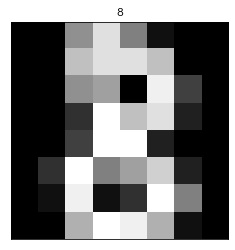

In [9]:
img_idx = 8
img = X[img_idx].reshape(8,8)
plt.imshow(img, cmap='gray')  #im: image, cmap:"gray" => 흑백(gray scale)으로 보여준다.

plt.title(y[img_idx])
plt.xticks([])  #축의 눈금을 제거
plt.yticks([])
plt.show()

### 불균형 데이터셋으로 만들기
0 ~ 9 숫자를 분류하기위한 데이터셋 => 9와 나머지를 분류하는 문제로 변환
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [10]:
y = np.where(y==9, 1, 0) # y==9: True-1, False-0

In [11]:
y_pct = np.unique(y,return_counts=True)
y_pct

(array([0, 1]), array([1617,  180], dtype=int64))

In [12]:
# 0과 1의 비율
y_pct[1]/y.size #배열.size : 원소개수 

array([0.89983306, 0.10016694])

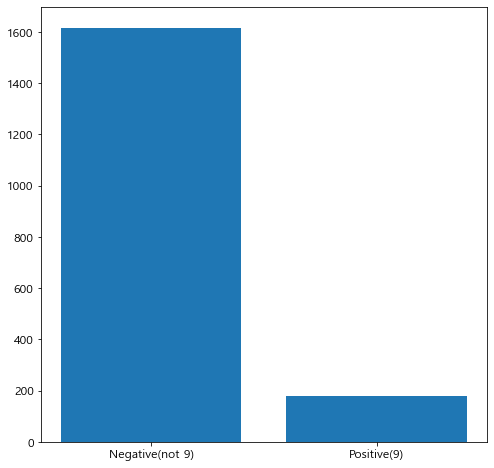

In [13]:
plt.figure(figsize=(8,8))
plt.bar(y_pct[0],y_pct[1])
plt.xticks([0,1], labels=['Negative(not 9)','Positive(9)']) 
plt.show()

### 데이터셋 분할
- train/test 로 분할

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0) #test_size: 생략 - default: 0.25

print(np.unique(y_train, return_counts=True)[1]/y_train.size)
print(np.unique(y_test, return_counts=True)[1]/y_test.size)

[0.89977728 0.10022272]
[0.9 0.1]


### 모델 생성 및 학습
#### Dummy Model 정의
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [15]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# 무조건 y중 빈도수가 제일 높은 class로 예측
dummy_model = DummyClassifier(strategy='most_frequent') # 모델이 아니라 모델 흉내낸 dummy 모델

dummy_model.fit(X_train, y_train)  #학습시 y의 최빈값을 찾는다.

pred_train_dummy = dummy_model.predict(X_train)  # 모두 0으로 추론한다. (0이 최빈값이므로)
pred_test_dummy = dummy_model.predict(X_test)

train_acc = accuracy_score(y_train, pred_train_dummy)
test_acc = accuracy_score(y_test, pred_test_dummy)
print(f"훈련데이터 정확도 {train_acc}, 테스트데이터 정확도: {test_acc}") 

훈련데이터 정확도 0.8997772828507795, 테스트데이터 정확도: 0.9


In [16]:
print(np.unique(pred_train_dummy), np.unique(pred_test_dummy))

[0] [0]


아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트의 평가지표로 정확도**만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

## 혼동 행렬(Confusion Marix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

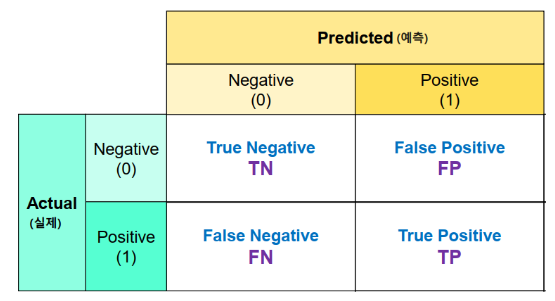

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - 이진 분류 뿐 아니라 모든 분류의 기본 평가지표.

### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPF) = \cfrac{FP}{TN+FP}$

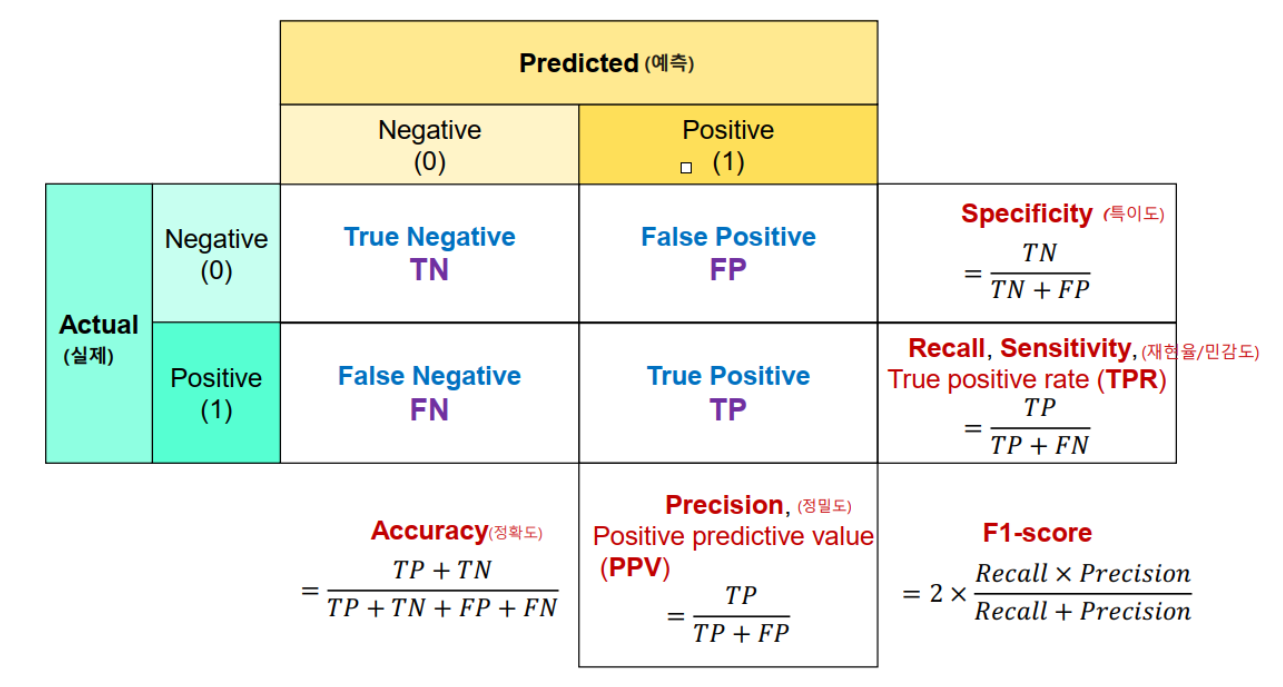

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값)/plot_confusion_matrix()->1.0에서 deprecated, ConfusionMatrixDisplay클래스**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

print(confusion_matrix(y_train,pred_train_dummy))
print("-"*50)
print(confusion_matrix(y_test, pred_test_dummy))

[[1212    0]
 [ 135    0]]
--------------------------------------------------
[[405   0]
 [ 45   0]]


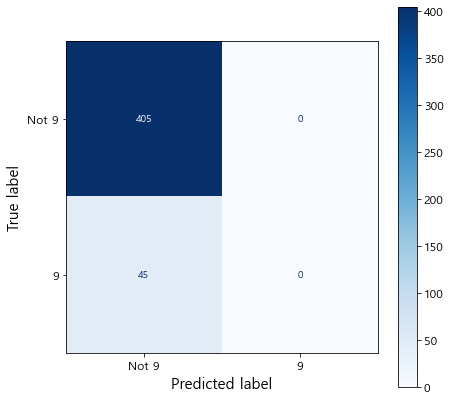

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(7,7))
ax = plt.gca()  #현재 axes를 조회
cm = confusion_matrix(y_test, pred_test_dummy)

disp = ConfusionMatrixDisplay(cm, #confusion matrix 배열
                              display_labels=['Not 9', '9']) # [음성레이블, 양성레이블]
disp.plot(cmap='Blues', ax=ax) #출력
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [19]:
print("Accuracy")
accuracy_score(y_train,pred_train_dummy), accuracy_score(y_test, pred_test_dummy)

Accuracy


(0.8997772828507795, 0.9)

In [20]:
print("Recall") 
recall_score(y_train, pred_train_dummy), recall_score(y_test, pred_test_dummy)

Recall


(0.0, 0.0)

In [21]:
print('Precision')
precision_score(y_train, pred_train_dummy), precision_score(y_test, pred_test_dummy)

Precision


E:\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [22]:
print('f1 score')
f1_score(y_train, pred_train_dummy), f1_score(y_test, pred_test_dummy)

f1 score


(0.0, 0.0)

### 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용(max_depth=3)
- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

#### 모델생성 및 학습

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### 평가

In [30]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score

cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)
print(cm_train)
print()
print(cm_test)

[[1167   45]
 [  27  108]]

[[394  11]
 [ 11  34]]


<function matplotlib.pyplot.show(close=None, block=None)>

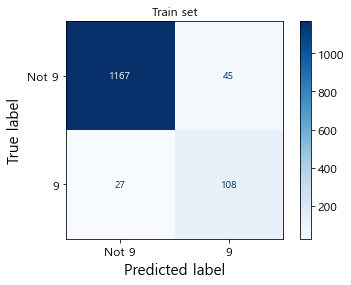

In [33]:
disp = ConfusionMatrixDisplay(cm_train, display_labels=['Not 9','9'])
disp.plot(cmap='Blues')
plt.title('Train set')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

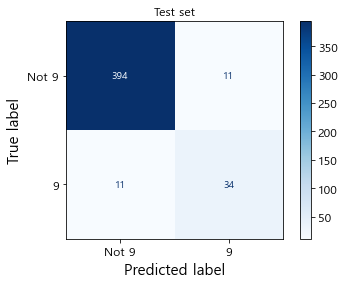

In [34]:
disp = ConfusionMatrixDisplay(cm_test, display_labels=['Not 9','9'])
disp.plot(cmap='Blues')
plt.title('Test set')
plt.show

In [35]:
# accuracy
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9465478841870824, 0.9511111111111111)

In [36]:
# recall
recall_score(y_train, pred_train), recall_score(y_test, pred_test)
# 0.75 : 전체 9중에서 75% 정확도로 추론했다.

(0.8, 0.7555555555555555)

In [37]:
# precision
precision_score(y_train, pred_train), precision_score(y_test, pred_test)
# 0.75: 9라고 예측한 것 중에서 75%가 맞았다.

(0.7058823529411765, 0.7555555555555555)

In [38]:
# f1 score
f1_score(y_train, pred_train), f1_score(y_test, pred_test)
# 모델의 9에대한 추론 성능 75% 정도 된다.

(0.7500000000000001, 0.7555555555555555)

### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [40]:
from sklearn.metrics import classification_report

result = classification_report(y_train, pred_train)
print(result)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1212
           1       0.71      0.80      0.75       135

    accuracy                           0.95      1347
   macro avg       0.84      0.88      0.86      1347
weighted avg       0.95      0.95      0.95      1347



## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

## Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

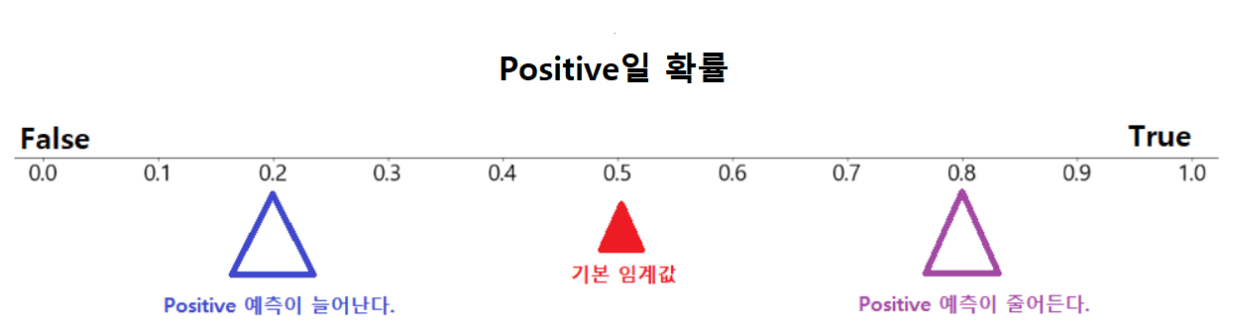

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화
##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

In [51]:
print(X_test.shape)
r = tree.predict_proba(X_test)
print(r.shape) # (450, 2) => (추론개수, 결과-0확률, 1확률)
r[-5:]

(450, 64)
(450, 2)


array([[0.45454545, 0.54545455],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

#### 임계값에 따른  Positive의 개수

In [44]:
np.where(r[:, 1] >= 0.5, 1, 0).sum()

45

In [50]:
np.where(r[:, 1] >= 0.001, 1, 0).sum()

450

##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [53]:
from sklearn.metrics import precision_recall_curve
#  양성 확률
pos_proba = tree.predict_proba(X_test)[:, 1] 
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)  #(정답-y, Positive_예측_확률)
# threshold(임계값) 별 - precision(정밀도), recall(재현율), thresholds
print(precisions.shape, recalls.shape, thresholds.shape)

(8,) (8,) (7,)


In [54]:
# precision/recall 리스트에는 threshold가 1일 때 결과값도 배열에 묶여서 반환되지만 threshold에는 1이 없다. 
thresholds = np.append(thresholds,1) #1을 추가
print(thresholds)
print(precisions.shape, recalls.shape, thresholds.shape)

[0.00826446 0.01304348 0.03389831 0.04       0.14925373 0.54545455
 0.75       1.        ]
(8,) (8,) (8,)


In [56]:
for r in zip(thresholds, precisions, recalls):
    print(r)

(0.008264462809917356, 0.1, 1.0)
(0.013043478260869565, 0.10757946210268948, 0.9777777777777777)
(0.03389830508474576, 0.4318181818181818, 0.8444444444444444)
(0.04, 0.5138888888888888, 0.8222222222222222)
(0.14925373134328357, 0.5606060606060606, 0.8222222222222222)
(0.5454545454545454, 0.7555555555555555, 0.7555555555555555)
(0.75, 0.8235294117647058, 0.6222222222222222)
(1.0, 1.0, 0.0)


In [57]:
import pandas as pd
pd.DataFrame({
    'threshold':thresholds,
    'precision':precisions,
    'recall':recalls
})

,threshold,precision,recall
0,0.008264,0.100000,1.000000
1,0.013043,0.107579,0.977778
2,0.033898,0.431818,0.844444
3,0.040000,0.513889,0.822222
4,0.149254,0.560606,0.822222
5,0.545455,0.755556,0.755556
6,0.750000,0.823529,0.622222
7,1.000000,1.000000,0.000000


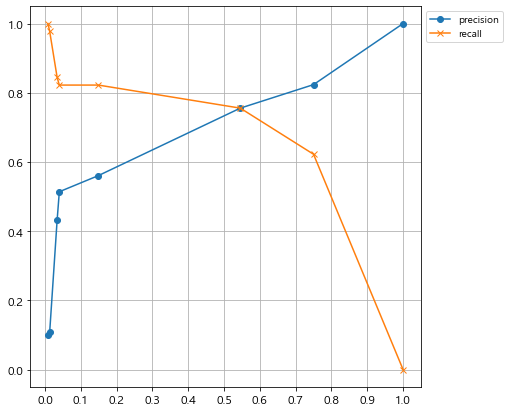

In [58]:
plt.figure(figsize=(7,7))
# X; threshold
plt.plot(thresholds, precisions, marker='o', label='precision') #y: precision 
plt.plot(thresholds, recalls, marker='x', label='recall') # y: recall 

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

### Binarizer - 임계값 변경
- Transformer로 설정한 임계점 보다 작으거나 같으면 0, 크면 1로 변환하는 변환기
- Binarizer를 이용해 원하는 임계값을 설정하여 양성/음성 분류기준을 변경할 수 있다.

In [59]:
from sklearn.preprocessing import Binarizer

In [60]:
exam = [[0.3, 0.7,0.4, 0.6, 0.5]]

binarizer = Binarizer(threshold=0.6) #0.1 이하: 0, 초과: 1  로 변환.
binarizer.fit_transform(exam) 

array([[0., 1., 0., 0., 0.]])

##### 모델 예측 결과에 적용

In [61]:
binarizer1 = Binarizer(threshold=0.1) 
binarizer2 = Binarizer(threshold=0.7) 

pred_proba = tree.predict_proba(X_test)      

# 후처리
pred_test_tree2 = binarizer1.fit_transform(pred_proba)[:, 1]
pred_test_tree3 = binarizer2.fit_transform(pred_proba)[:, 1]

In [62]:
from metrics import print_classification_metrics

print('결정트리 - 임계값(0.1)')
# print(recall_score(y_test, pred_test_tree2), precision_score(y_test, pred_test_tree2))
print_classification_metrics(y_test, pred_test_tree2, title='임계값 0.1')


print('결정트리 - 임계값(0.7)')
# print(recall_score(y_test, pred_test_tree3), precision_score(y_test, pred_test_tree3))
print_classification_metrics(y_test, pred_test_tree3, title='임계값 0.7')

결정트리 - 임계값(0.1)
임계값 0.1
--------------------------------------------------
정확도(Accuracy): 0.9177777777777778
재현율/민감도(Recall): 0.8222222222222222
정밀도(Precision): 0.5606060606060606
F1 점수(F1 Score): 0.6666666666666666
결정트리 - 임계값(0.7)
임계값 0.7
--------------------------------------------------
정확도(Accuracy): 0.9488888888888889
재현율/민감도(Recall): 0.6222222222222222
정밀도(Precision): 0.8235294117647058
F1 점수(F1 Score): 0.7088607594936709


## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- Positive 확률 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
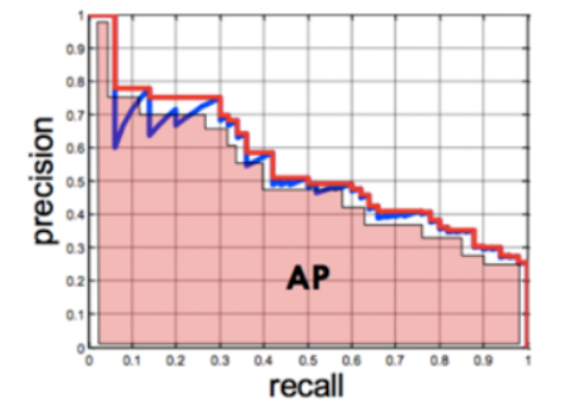

#### precision_recall_curve

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rfc = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=0)

# 모델 학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

tree_pos = tree.predict_proba(X_test)[:, 1]
rfc_pos= rfc.predict_proba(X_test)[:, 1]

precision1, recall1, threshold1 = precision_recall_curve(y_test, tree_pos)
precision2, recall2, threshold2 = precision_recall_curve(y_test, rfc_pos)

print(precision1.shape, recall1.shape, threshold1.shape)
print(precision2.shape, recall2.shape, threshold2.shape)

(8,) (8,) (7,)
(451,) (451,) (450,)


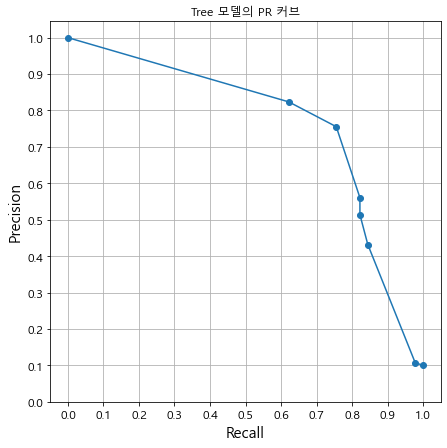

In [66]:
plt.figure(figsize=(7,7))
# threshold1
plt.plot(recall1, precision1, marker='o') 

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tree 모델의 PR 커브')
plt.grid(True)
plt.show()

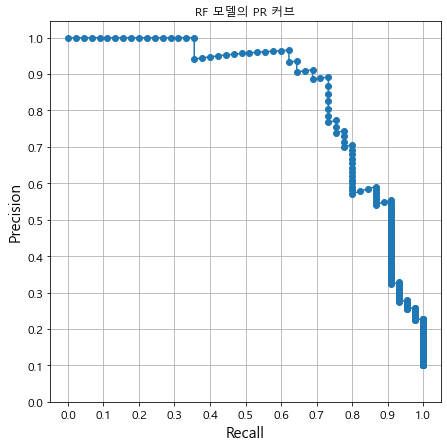

In [67]:
plt.figure(figsize=(7,7))
# threshold1
plt.plot(recall2, precision2, marker='o') 

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RF 모델의 PR 커브')
plt.grid(True)
plt.show()

#### average_precision_score
- precision recall curve를 점수(정량)화. - Average Precision score (ap score)

In [72]:
from sklearn.metrics import average_precision_score

ap_tree = average_precision_score(y_test, tree_pos) #(정답, pos 확률)
ap_rfc = average_precision_score(y_test, rfc_pos)
ap_tree, ap_rfc 

(0.6766948888666132, 0.8486345312919418)

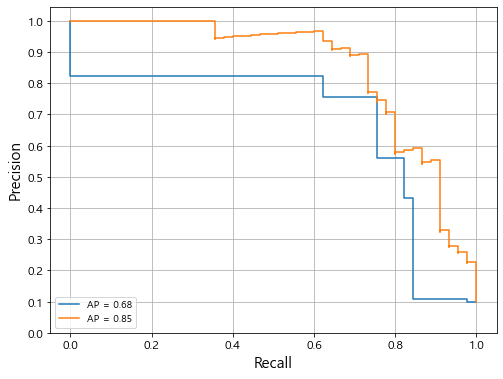

In [75]:
from sklearn.metrics import PrecisionRecallDisplay  # 새버전(1.0에서 추가)
plt.figure(figsize=(8,6))
ax = plt.gca()

disp = PrecisionRecallDisplay(precision1, recall1, #  X, y축에 지정할 Precision, recall 값들(precision_recall_curve() 가 반환한값)
                              average_precision=ap_tree) # ap score (그래프에 ap score가 나오게 하려면 넣어주고 아니면 생략가능)
disp.plot(ax=ax)

# randomforest
disp2 = PrecisionRecallDisplay(precision2, recall2, average_precision=ap_rfc)
disp2.plot(ax=ax)

plt.grid(True)
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$

- **ROC Curve**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
    - FPR과 TPR의 변화는 비례해서 변화한다.
        - 낮은 임계값에서 큰 임계값으로 변경하면 높은 값에서 낮은 값으로 같이 변화한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

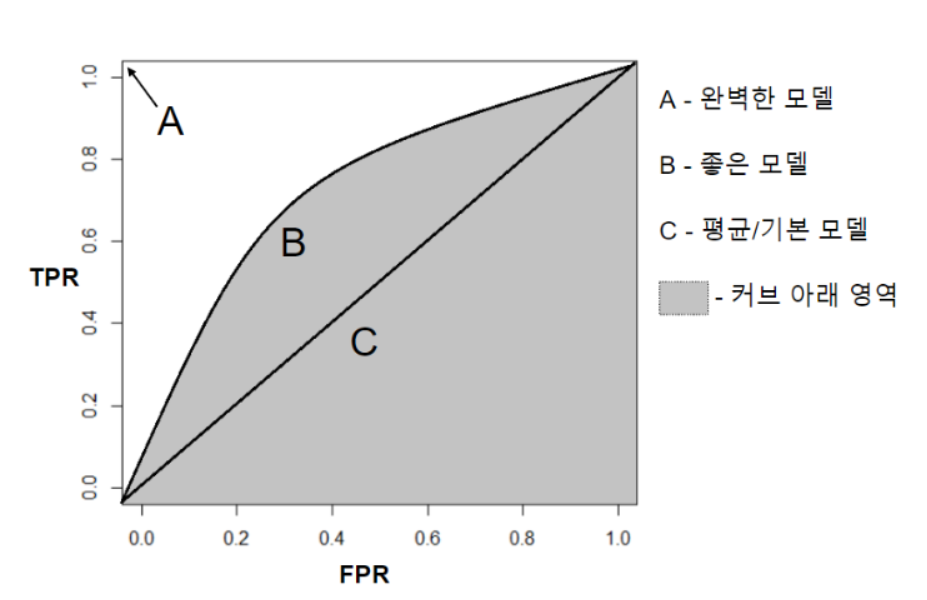

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, POS_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, POS_예측확률) : AUC 점수 반환

## ROC Curve - Precision_Recall Curve
- ROC Curve - roc auc score
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- Precision Recall curve - ap score
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

tree_pos = tree.predict_proba(X_test)[:, 1]  # 양성(Positive) 확률
rfc_pos= rfc.predict_proba(X_test)[:, 1]

fprs_tree, tprs_tree, thresholds_tree = roc_curve(y_test, tree_pos)
fprs_rfc, tprs_rfc, thresholds_rfc = roc_curve(y_test, rfc_pos)

print(fprs_tree.shape, tprs_tree.shape, thresholds_tree.shape)
print(fprs_rfc.shape, tprs_rfc.shape, thresholds_rfc.shape)

(8,) (8,) (8,)
(30,) (30,) (30,)


In [77]:
pd.DataFrame({
    "Threshold":thresholds_tree,
    "FPR": fprs_tree,
    "TPR": tprs_tree
})

,Threshold,FPR,TPR
0,1.750000,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


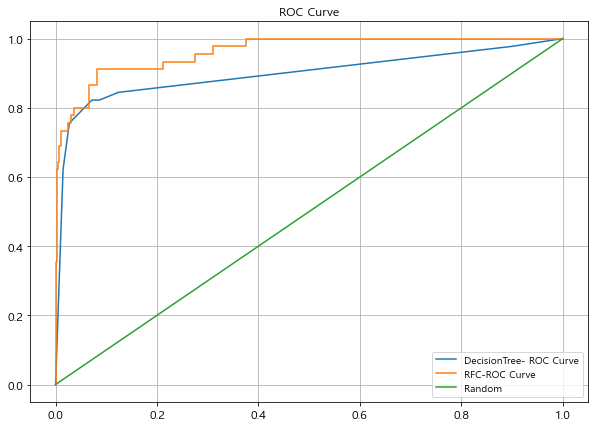

In [78]:
plt.figure(figsize=(10,7))
plt.plot(fprs_tree, tprs_tree, label='DecisionTree- ROC Curve')
plt.plot(fprs_rfc, tprs_rfc, label='RFC-ROC Curve')
plt.plot([0,1], [0,1], label='Random')

plt.legend(loc='lower right')
plt.grid(True)
plt.title('ROC Curve')
plt.show()


#### roc auc score

In [79]:
from sklearn.metrics import roc_auc_score

auc_tree = roc_auc_score(y_test, tree_pos)
auc_rfc = roc_auc_score(y_test, rfc_pos)
print("DecisionTree roc auc점수:", auc_tree)
print("RandomForest roc auc점수:", auc_rfc)

DecisionTree roc auc점수: 0.8975308641975308
RandomForest roc auc점수: 0.9623045267489712


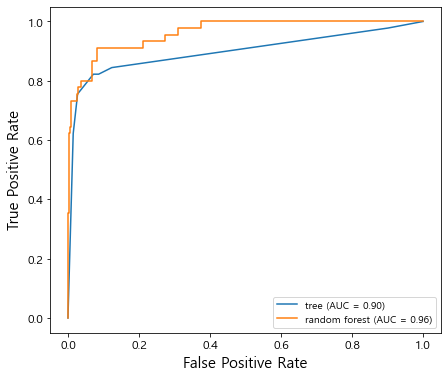

In [81]:
from sklearn.metrics import RocCurveDisplay  #새버전
plt.figure(figsize=(7,6))
ax = plt.gca()

disp1 = RocCurveDisplay(fpr=fprs_tree, tpr=tprs_tree,
                        roc_auc=auc_tree, estimator_name='tree')  #범례에 나올값들
disp1.plot(ax=ax)

disp2 = RocCurveDisplay(fpr=fprs_rfc, tpr=tprs_rfc, roc_auc=auc_rfc, estimator_name='random forest')
disp2.plot(ax=ax)

plt.show()